In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import seaborn as sns

In [2]:
data = pd.read_pickle("../rates_and_clusters/ratesClusters_filled_days.pkl")
data.head()

,AllDates,cluster,Taken Date,INCONCLUSIVE,NEGATIVE,POSITIVE,Total,caseRate,rolPos,rolTotal,rolCaseRate,sgPos,sgTotal,sgCaseRate
0,2020-01-21,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.065970,0.0
1,2020-01-22,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.015434,0.0
2,2020-01-23,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,-0.019664,0.0
3,2020-01-24,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,-0.041045,0.0
4,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,-0.050431,0.0


In [3]:
clusters = pd.read_pickle('../rates_and_clusters/geoCodes_and_clusters.pkl')
clusters.head()

,facility,lat,lng,cluster0,cluster
0,COVID FS MANGAUNG METRO,-29.085214,26.159576,0,0
1,PELONOMI HOSPITAL,-29.139553,26.244724,0,0
2,BONGANI REGIONAL HOSPITAL,-27.953400,26.785200,1,1
3,UNIVERSITAS HOSPITAL,-29.116625,26.184106,0,0
4,BOTSHABELO HOSPITAL,-29.232500,26.715400,2,2


### Lets start by looking at the Mangaung area

In [4]:
mm_df = data[data['cluster'] == '0']
mm_df

,AllDates,cluster,Taken Date,INCONCLUSIVE,NEGATIVE,POSITIVE,Total,caseRate,rolPos,rolTotal,rolCaseRate,sgPos,sgTotal,sgCaseRate
0,2020-01-21,0,0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.000000,0.065970,0.000000
1,2020-01-22,0,0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.000000,0.015434,0.000000
2,2020-01-23,0,0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.000000,-0.019664,0.000000
3,2020-01-24,0,0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.000000,-0.041045,0.000000
4,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.000000,-0.050431,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,2022-02-09,0,2022-02-09 00:00:00,9.0,252.0,16.0,277.0,0.057762,16.285714,232.714286,0.068121,14.575972,234.544444,0.057156
751,2022-02-10,0,2022-02-10 00:00:00,13.0,212.0,14.0,239.0,0.058577,16.285714,233.714286,0.067869,12.458356,203.710630,0.051924
752,2022-02-11,0,2022-02-11 00:00:00,4.0,171.0,9.0,184.0,0.048913,14.571429,229.285714,0.060903,9.698753,161.019941,0.046064
753,2022-02-12,0,2022-02-12 00:00:00,0.0,82.0,6.0,88.0,0.068182,14.857143,224.000000,0.066072,6.213627,104.988707,0.039526


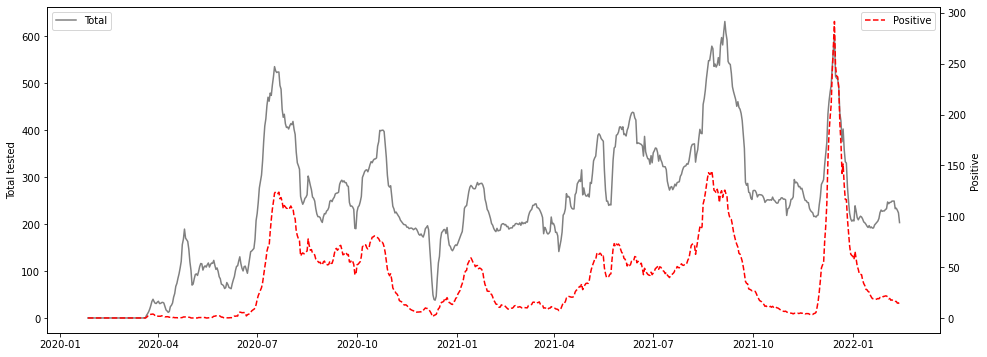

In [5]:
dates = mm_df['AllDates']
tot = mm_df['rolTotal']
pos = mm_df['rolPos']
from sklearn.preprocessing import StandardScaler
totSc = StandardScaler().fit_transform(np.array(tot).reshape(-1,1))
posSc = StandardScaler().fit_transform(np.array(pos).reshape(-1,1))

fig, ax1 = plt.subplots(figsize=(16,6))

ax1.plot_date(x=dates, y=tot, label='Total', color='grey', fmt='-')
ax2 = ax1.twinx()
ax2.plot_date(x=dates, y=pos, label='Positive', color='red', fmt='--') 
ax1.set_ylabel('Total tested')
ax2.set_ylabel('Positive')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

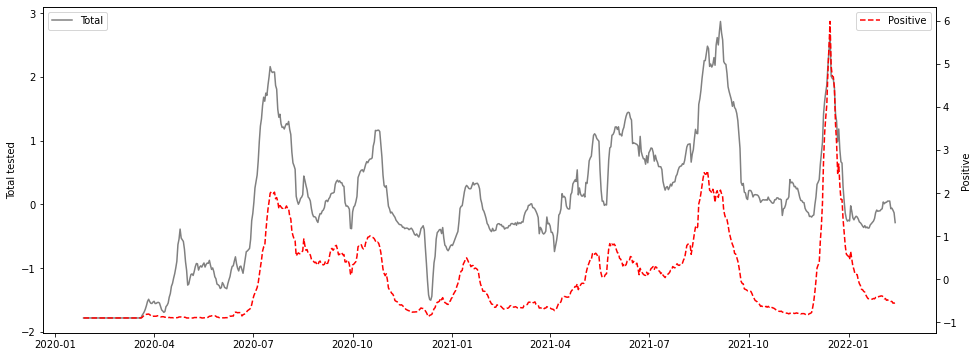

In [6]:
dates = mm_df['AllDates']

fig, ax1 = plt.subplots(figsize=(16,6))

ax1.plot_date(x=dates, y=totSc, label='Total', color='grey', fmt='-')
ax2 = ax1.twinx()
ax2.plot_date(x=dates, y=posSc, label='Positive', color='red', fmt='--') 
ax1.set_ylabel('Total tested')
ax2.set_ylabel('Positive')
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

### Waves

https://github.com/mnf2014/article_fft_wavelet_ecg/blob/develop/wavelet_article_octo.ipynb

In [7]:
import pywt
import scaleogram as scg

#### Plot some wavelets

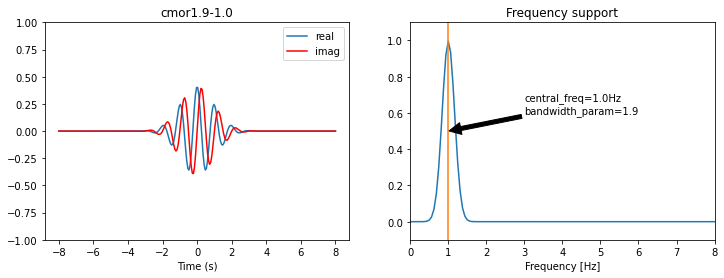

In [8]:
motherW = 'cmor1.9-1.0'  #NB use the numbers to specify the central freq and bandwidth
axes = scg.plot_wav(motherW, figsize=(12,4))

#### Example

### Mangaung data

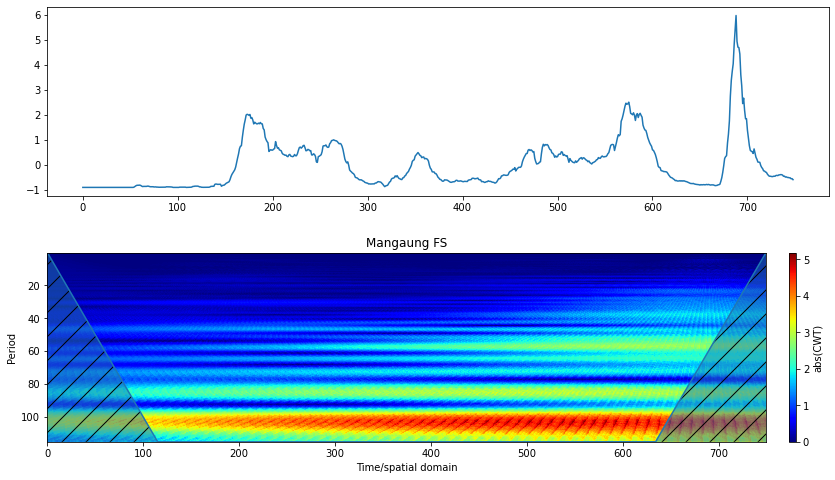

In [10]:
dates = mm_df['AllDates']
tot = mm_df['rolTotal']
pos = mm_df['rolPos']
from sklearn.preprocessing import StandardScaler
totSc = StandardScaler().fit_transform(np.array(tot).reshape(-1,1))
posSc = StandardScaler().fit_transform(np.array(pos).reshape(-1,1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
fig.subplots_adjust(hspace=0.3)
ax1.plot(np.arange(0,len(posSc[6:])), np.array(posSc[6:]))


ax2 = scg.cws(np.arange(0,len(posSc[6:])), posSc[6:].reshape(1,-1)[0], scales=np.arange(1, 800), wavelet='cmor1-7.0', coi=95,
        ax=ax2, title='Mangaung FS')